# Analysis and visualization of PISA results
## by Anne

## Investigation Overview

> The analysis of the PISA results shows significant similarities and differences between the participating countries.

## Dataset Overview

> The PISA study is an international study on education. It compared results from lots of countries and also collects different information, e.g. living situation, family situation etc.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
data_raw = pd.read_csv('pisa2012.csv')

#resize data set
data = data_raw[['CNT', 
                 'OECD', 
                 'ST43Q01', 
                 'ST42Q02', 
                 'ST26Q06', 
                 'ST26Q04', 
                 'ST19Q01', 
                 'ST17Q01', 
                 'ST15Q01', 
                 'ST13Q01', 
                 'ST04Q01',
                 'PV1MATH', 
                 'PV1READ', 
                 'PV1SCIE']]

#rename column names
data = data.rename(columns={"CNT" : "country", 
                     "OECD" : "oecd",
                     "ST43Q01" : "control",
                     "ST42Q02" : "self_concept",
                     "ST26Q06" : "internet",
                     "ST26Q04" : "computer",
                     "ST19Q01" : "father_job_status",
                     "ST17Q01" : "father_school",
                     "ST15Q01" : "mother_job_status",
                     "ST13Q01" : "mother_school",
                     "ST04Q01" : "gender",
                     "PV1MATH" : "math",
                     "PV1READ" : "read",
                     "PV1SCIE" : "science"})

In [4]:
#include order for categorical variables
classes = ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree']
cclasses = pd.api.types.CategoricalDtype(ordered=True, categories=classes)
data['control'] = data['control'].astype(cclasses);

In [5]:
sclasses = pd.api.types.CategoricalDtype(ordered=True, categories=classes)
data['self_concept'] = data['self_concept'].astype(sclasses);

In [6]:
statusclasses = ['Working full-time <for pay> ', 'Working part-time <for pay>', 'Not working, but looking for a job', 'Other (e.g. home duties, retired) ']
stclasses = pd.api.types.CategoricalDtype(ordered=True, categories=statusclasses)
data['father_job_status'] = data['father_job_status'].astype(stclasses);

In [7]:
cclasses = pd.api.types.CategoricalDtype(ordered=True, categories=statusclasses)
data['mother_job_status'] = data['mother_job_status'].astype(stclasses);

In [8]:
motherclasses = ['<ISCED level 3B, 3C> ', '<ISCED level 3A> ', '<ISCED level 2> ', '<ISCED level 1> ', 'No <ISCED level 1> ']
mclasses = pd.api.types.CategoricalDtype(ordered=True, categories=motherclasses)
data['mother_school'] = data['mother_school'].astype(mclasses);

In [9]:
fatherclasses = ['<ISCED level 3B, 3C> ', '<ISCED level 3A> ', '<ISCED level 2> ', '<ISCED level 1> ', 'No <ISCED level 1> ']
fclasses = pd.api.types.CategoricalDtype(ordered=True, categories=fatherclasses)
data['father_school'] = data['father_school'].astype(fclasses);

In [10]:
base_color = sb.color_palette()[0] 

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Significant differences in average maths scores between countries

> The average math results per country vary widely. However, there is no clear pattern regarding OECD and Non-OECD countries. While lots of Non-OECD countries don't perform well, the top performers are also Non-OECD countries. Besides that, the variance of the math results is huge in all the countries.

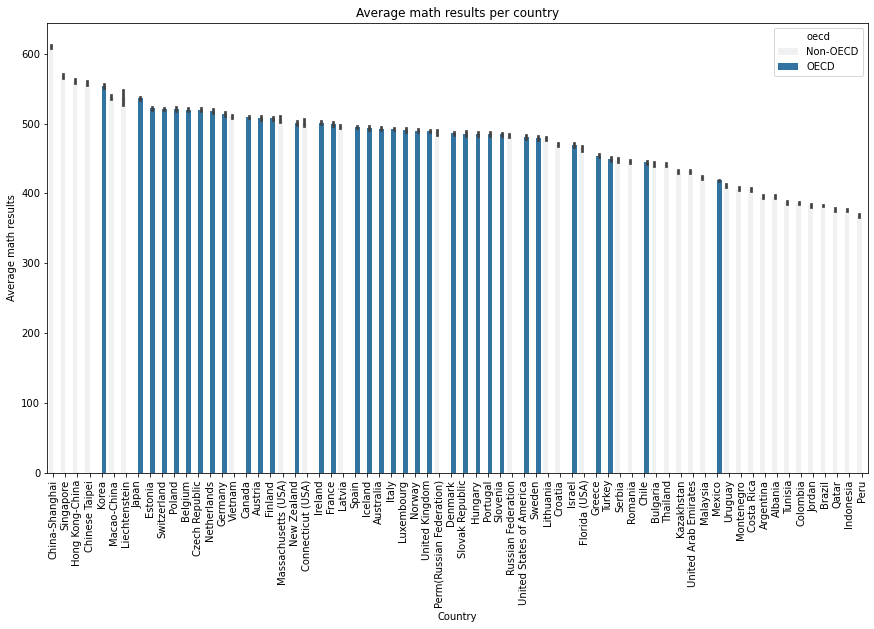

In [11]:
country_mean = data.groupby(['country']).mean()
country_mean_math_sort = country_mean.sort_values(by=['math'], ascending=False)
order = country_mean_math_sort.index

plt.figure(figsize=[14.70, 8.27])
g = sb.barplot(data=data, x='country', y='math', hue='oecd', color=base_color, order=order)
plt.xticks(rotation=90)
plt.title('Average math results per country')
plt.xlabel('Country')
plt.ylabel('Average math results');

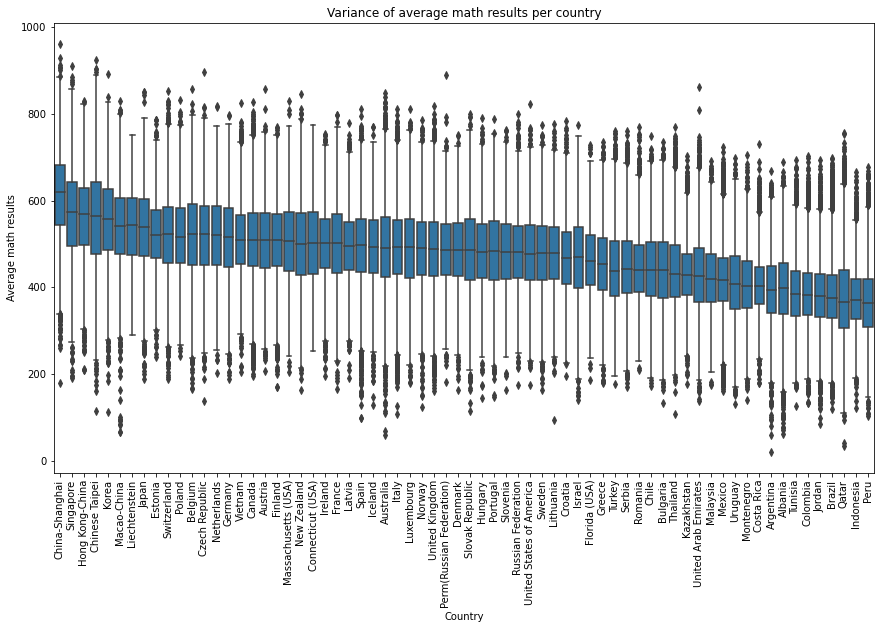

In [12]:
plt.figure(figsize=[14.70, 8.27])
sb.boxplot(data=data, x='country', y='math', color=base_color, order=order)
plt.xticks(rotation=90)
plt.title('Variance of average math results per country')
plt.xlabel('Country')
plt.ylabel('Average math results');

## Same trends in self concept visible in best and worst performing country

> Students from Shanghai achieved the best math results while students from Peru achieved the worst math results. However, there are similar trends visible. If students have a more positive self concept, e.g. students think that they are good at math, they generally perform better.

In [13]:
shanghai = data.query('country == "China-Shanghai"')
peru = data.query('country == "Peru"')

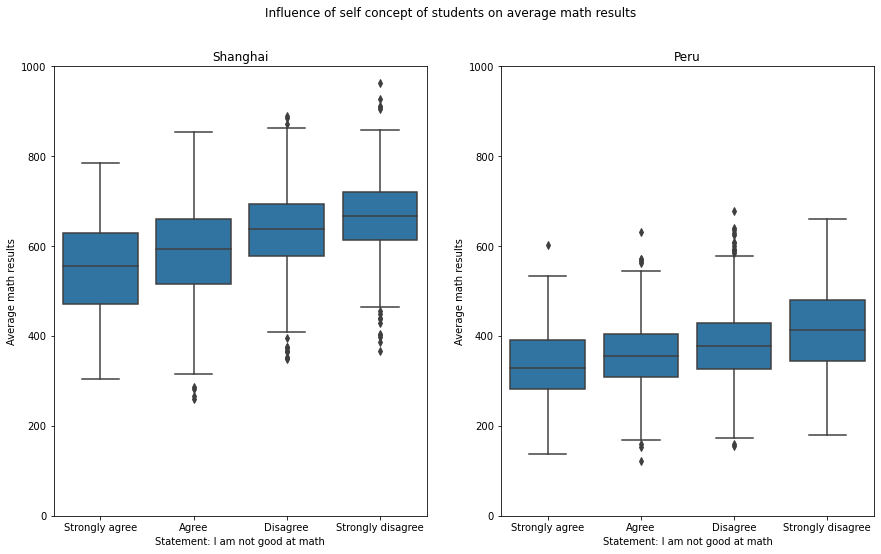

In [14]:
plt.figure(figsize=[14.70, 8.27])
plt.tight_layout()

plt.subplot(1,2,1)
g = sb.boxplot(data=shanghai, x='self_concept', y='math', color=base_color)
g.set_ylim(0, 1000)
plt.title('Shanghai')
plt.suptitle('Influence of self concept of students on average math results')
plt.xlabel('Statement: I am not good at math')
plt.ylabel('Average math results')

plt.subplot(1,2,2)
g = sb.boxplot(data=peru, x='self_concept', y='math', color=base_color)
g.set_ylim(0, 1000)
plt.title('Peru')
plt.xlabel('Statement: I am not good at math')
plt.ylabel('Average math results');

## Education of parents having same effect on male and female students

> On average students achieved the highest math results when their mothers earned an ISCED level 3A degree. Interestingly, if mothers earned an ISCED level 3B or 3C degree, the average math results slightly decrease. The same trends are visible for male and female students.

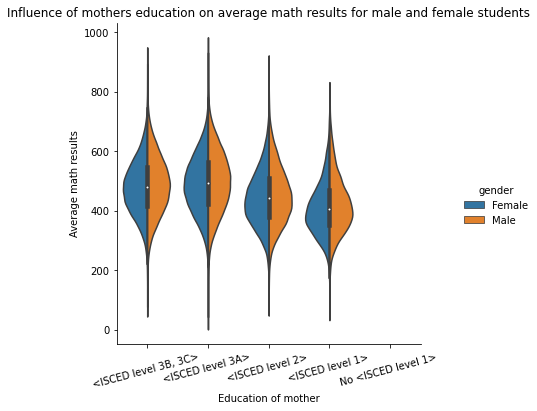

In [16]:
sb.catplot(data=data, x="mother_school", y="math", hue="gender", kind="violin", split=True)
plt.xticks(rotation=15)
plt.title('Influence of mothers education on average math results for male and female students')
plt.xlabel('Education of mother')
plt.ylabel('Average math results');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!